In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
file_path = '/srv/CLAP/roi/BioLingual/output/2024-08-07_23-55-09/predicted_true_values_2024-08-07_23-55-09_1_0_0_0_spectrogram_PAPER_5_0.5.csv'
# file_paht ='CLAP/roi/BioLingual/output/2024-04-03_06-03-28/predicted_true_values_2024-04-03_06-03-28_0-5_0-2_0-1_0-2.csv
# CLAP/roi/BioLingual/output/predicted_true_values_2024-02-21_09-30-38.csv
# CLAP/roi/BioLingual/output/predicted_true_values_2024-02-20_21-28-09.csv
# Read the CSV file
# Read the CSV file
df = pd.read_csv(file_path)

# Now you can perform operations on your DataFrame 'df'
# print(df.head())  # Display the first few rows of the DataFrame

split_labels = df['true'].str.split()

# Extract specific elements from the split lists
selected_columns = {
    'ship_type': [label[0] for label in split_labels],
    'distance_category': [label[3] for label in split_labels],
    'speed_category': [label[7] for label in split_labels],
    'activity': [label[9] for label in split_labels]
}

# Create a DataFrame from the selected columns
selected_df = pd.DataFrame(selected_columns)


split_labels_predicted = df['predicted'].str.split()

# Extract specific elements from the split lists
selected_columns_predicted = {
    'ship_type_predicted': [label[0] for label in split_labels_predicted],
    'distance_category_predicted': [label[3] for label in split_labels_predicted],
    'speed_category_predicted': [label[7] for label in split_labels_predicted],
    'activity_predicted': [label[9] for label in split_labels_predicted]
}
selected_df_predicted = pd.DataFrame(selected_columns_predicted)
# Create a DataFrame from the selected columns

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [37]:
selected_df

,ship_type,distance_category,speed_category,activity
0,Cargo,0-1,0-1.5,at-anchor
1,Cargo,0-1,0-1.5,at-anchor
2,Cargo,0-1,0-1.5,at-anchor
3,Cargo,0-1,0-1.5,at-anchor
4,Cargo,0-1,0-1.5,at-anchor


In [40]:
selected_df_predicted["activity_predicted"]

0       underway-using-engine
1       underway-using-engine
2       underway-using-engine
3       underway-using-engine
4       underway-using-engine
                ...          
1192                at-anchor
1193                at-anchor
1194                at-anchor
1195    underway-using-engine
1196                at-anchor
Name: activity_predicted, Length: 1197, dtype: object

Accuracy for distance_category: 0.2824220515137822


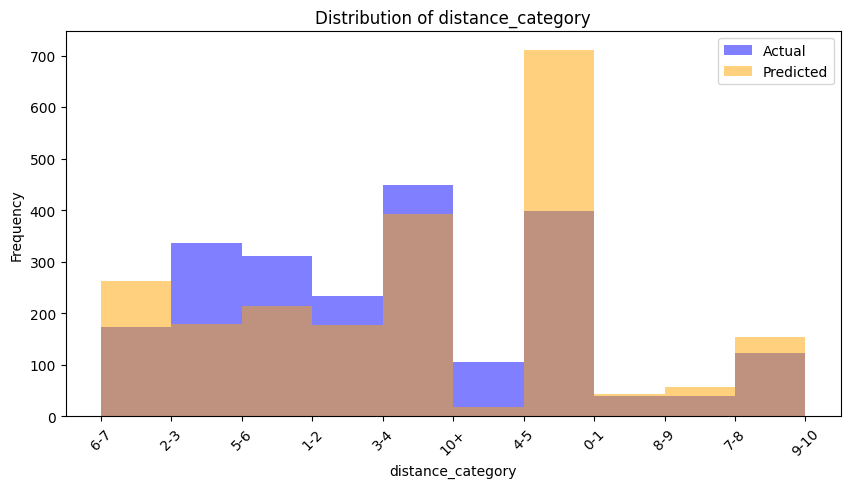

In [3]:
from sklearn.metrics import accuracy_score

# Define the categories
categories = [ 'distance_category'] #, 'speed_category']

# Calculate accuracy for each category
for category in categories:
    actual_values = selected_df[category]
    predicted_values = selected_df_predicted[category + '_predicted']  # Adjust column name for predicted values
    
    accuracy = accuracy_score(actual_values, predicted_values)
    
    print(f"Accuracy for {category}: {accuracy}")

    # Create histograms for actual and predicted values
    plt.figure(figsize=(10, 5))
    plt.hist(actual_values, alpha=0.5, label='Actual', color='blue', align='mid')
    plt.hist(predicted_values, alpha=0.5, label='Predicted', color='orange', align='mid')
    plt.xlabel(category)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


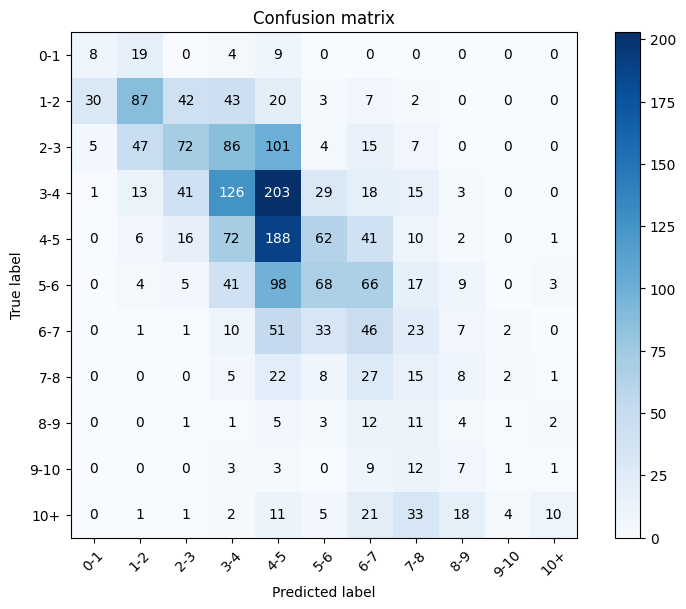

Mean Squared Error: 2.954812471757795
Root Mean Squared Error (RMSE): 1.7189567975251139 km


In [4]:
# Define the plot_confusion_matrix function
from sklearn.metrics import mean_squared_error
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Define the mapping
def map_category_to_number(category):
    if category == "10+":
        return 10
    else:
        lower, upper = map(int, category.split('-'))
        return (lower + upper) / 2
# Calculate confusion matrix for each category
for category in categories:
    actual_values = selected_df[category]
    predicted_values = selected_df_predicted[category + '_predicted']  # Adjust column name for predicted values
    
    # Compute confusion matrix
    labels=sorted(set(actual_values) | set(predicted_values))
    if category=="distance_category":
        labels.sort(key=lambda x: float(x.split('-')[0]) if x != '10+' else float('inf'))
    cm = confusion_matrix(actual_values, predicted_values, labels=labels)


    plot_confusion_matrix(cm, title, classes=labels)
    # Apply the mapping
    actual_numeric = actual_values.apply(map_category_to_number)
    predicted_numeric = predicted_values.apply(map_category_to_number)
    
    # Calculate the MSE
    mse = mean_squared_error(actual_numeric, predicted_numeric)
    print(f"Mean Squared Error: {mse}")
    import numpy as np
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse} km")





In [24]:
lines

['lr = 1e-05\n',
 'Learning rate after epoch 0: 1e-05\n',
 '{"epoch": 0, "train": {"loss": 12.728561039872213, "metric": 0.8333298144053431, "metric_distance": 0.8333298144053431, "metric_speed": 1.0, "metric_activity": 1.0, "metric_type": 1.0}, "valid": {"loss": 12.720719712977388, "metric": 0.834865306109092, "metric_distance": 0.834865306109092, "metric_speed": 1.0, "metric_activity": 1.0, "metric_type": 1.0}}\n',
 'Learning rate after epoch 1: 1e-05\n',
 'breaking next cycle\n',
 '{"epoch": 1, "train": {"loss": 12.658780660051562, "metric": 0.8531455404036624, "metric_distance": 0.8531455404036624, "metric_speed": 1.0, "metric_activity": 1.0, "metric_type": 1.0}, "valid": {"loss": 12.766735690097635, "metric": 0.8194144506171368, "metric_distance": 0.8194144506171368, "metric_speed": 1.0, "metric_activity": 1.0, "metric_type": 1.0}}\n',
 'Learning rate after epoch 2: 1e-05\n',
 'breaking next cycle\n',
 '{"test": {"loss": 12.649719270684141, "metric": 0.8316203829707616, "metric_di

yes
yes


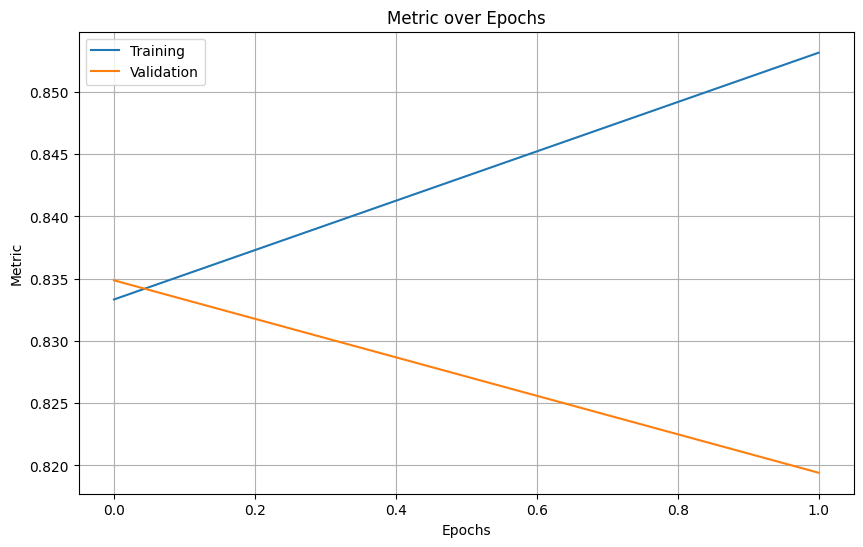

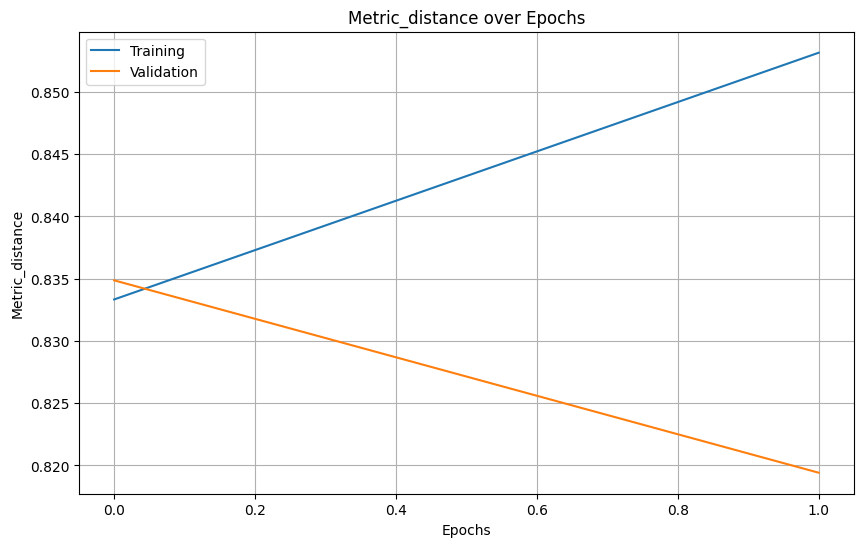

In [26]:
import json
import matplotlib.pyplot as plt

# Open the log file and read its contents
with open('/srv/CLAP/roi/BioLingual/logs_1_0_0_0_spectrogram_PAPER_NORMAL.log', 'r') as file:
    lines = file.readlines()


# Initialize lists to store metrics
train_metrics = {'metric': [], 'metric_distance': []}
valid_metrics = {'metric': [], 'metric_distance': []}
test_metrics = {'metric': [], 'metric_distance': []}

# Parse JSON entries and extract metrics
for line in lines[1:]:
    try:
        entry = json.loads(line)
        train = entry['train']
        valid = entry['valid']
        # test = entry['test']
    
        for key in train_metrics.keys():
            train_metrics[key].append(train[key])
            valid_metrics[key].append(valid[key])
            # test_metrics[key].append(test[key])
        print("yes")
    except:
        pass
# Extract metric values for plotting
epochs = list(range(len(train_metrics['metric'])))  # Assuming all metrics have the same length
metrics_to_plot = train_metrics.keys()


# Extract metric values for plotting
epochs = list(range(len(train_metrics['metric'])))  # Assuming all metrics have the same length
metrics_categories = ['metric', 'metric_distance']

# Plotting each metric category in a separate figure
for category in metrics_categories:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_metrics[category], label='Training')
    plt.plot(epochs, valid_metrics[category], label='Validation')
    # plt.plot(epochs, test_metrics[category], label='Test')

    plt.title(f'{category.capitalize()} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(category.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
train_metrics = {'metric': [], 'metric_distance': []}

In [16]:
train=json.loads(lines[2])['train']

for key in train_metrics.keys():
        train_metrics[key].append(train[key])

In [18]:
 test_metrics

{'metric': [],
 'metric_distance': [],
 'metric_speed': [],
 'metric_activity': []}